<a href="https://colab.research.google.com/github/kasubikila/githubTest/blob/main/%3Cyour_x500%3EHomework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1.1 Finding critical points of a single variable functions using gradient descent

We will use gradient descent to find the minimum of the polynomial below.

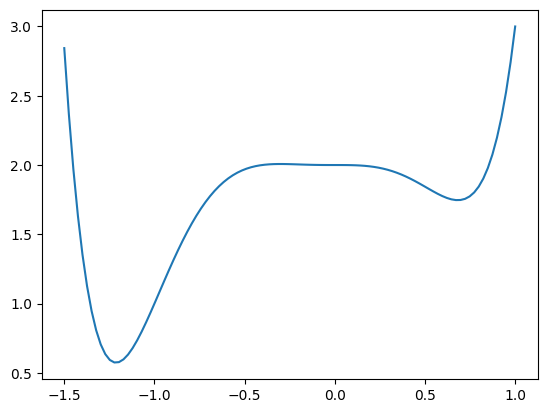

In [ ]:
def f(x):
  return 2 * x**6 + 2 * x**5 - 2 * x**4 - x**3 +2

# plot of the polynomial
x = np.linspace(-1.5, 1, 100)
plt.figure()
plt.plot(x, f(x))
plt.show()


## (a) Computing the derivative of the function

Write the body of the function df(x) which returns the derivative of the function f(x) at the point x.

In [ ]:
def df(x):
    # Derivative of the function f(x)
    return 12 * x**5 + 10 * x**4 - 8 * x**3 - 3 * x**2

# Check the derivative at specific points
print(f"Derivative at x = -1.5: {df(-1.5)}")
print(f"Derivative at x = -1: {df(-1)}")
print(f"Derivative at x = -0.5: {df(-0.5)}")
print(f"Derivative at x = 0: {df(0)}")
print(f"Derivative at x = 1: {df(1)}")


Derivative at x = -1.5: -20.25
Derivative at x = -1: 3
Derivative at x = -0.5: 0.5
Derivative at x = 0: 0
Derivative at x = 1: 11


## (b) Write the code for the gradient descent algorithm

Use the pseudo-code provided to write the gradient descent algorithm below.

Minimum found at x = -1.2140414379794262
f(x) at the minimum = 0.5736329221970602


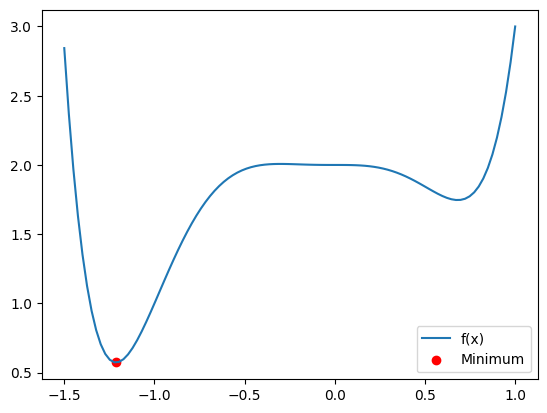

In [ ]:
# Function to minimize
def f(x):
    return 2 * x**6 + 2 * x**5 - 2 * x**4 - x**3 + 2

# Derivative of the function
def df(x):
    return 12 * x**5 + 10 * x**4 - 8 * x**3 - 3 * x**2

# Gradient Descent function
def gradient_descent(x0, dF, learning_rate=0.001, tolerance=1e-6, max_iters=10000):
    x = x0
    for _ in range(max_iters):
        x_new = x - learning_rate * dF(x)
        if abs(f(x_new) - f(x)) < tolerance:
            break
        x = x_new
    return x

# Initial guess
x0 = -1.5
result = gradient_descent(x0, df)

# Print the result
print("Minimum found at x =", result)
print("f(x) at the minimum =", f(result))

# Plot the function and the result
x = np.linspace(-1.5, 1, 100)
plt.plot(x, f(x), label="f(x)")
plt.scatter(result, f(result), color="red", label="Minimum")
plt.legend()
plt.show()

We will now see how our algorithm deals with different initial guesses.

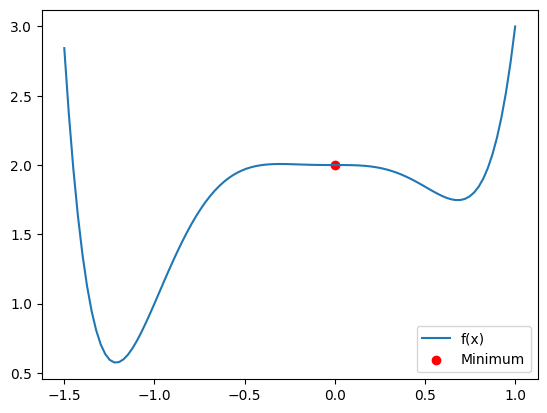

Minimum found at x = 0
f(x) at the minimum = 2


In [ ]:
# Gradient Descent function
def gradient_descent(x0, dF, learning_rate=0.001, tolerance=1e-6, max_iters=10000):
    x = x0
    for _ in range(max_iters):
        x_new = x - learning_rate * dF(x)
        if abs(f(x_new) - f(x)) < tolerance:
            break
        x = x_new
    return x

# Gradient descent with an initial guess x0 = 0
result = gradient_descent(0, df)

# Plot the function and the result
x = np.linspace(-1.5, 1, 100)
plt.figure()
plt.plot(x, f(x), label="f(x)")
plt.scatter(result, f(result), color="red", label="Minimum")
plt.legend()
plt.show()

# Print the result
print("Minimum found at x =", result)
print("f(x) at the minimum =", f(result))


#### TODO: What do you observe from the plots? Where does the algorithm usually get stuck? Is it always at the lowest point of the function?

**TODO WRITE YOUR ANSWER HERE**
Behavior of the Gradient Descent Algorithm:

1. The gradient descent algorithm successfully converges to a local minimum of the function depending on the initial guess x0.
Where Does the Algorithm Get Stuck?:

2. The algorithm can get stuck at local minima instead of reaching the global minimum if the function has multiple minima. For example, if the starting point x0 is close to a local minimum, the algorithm will converge to that point because gradient descent follows the steepest descent based on the derivative.
It can also "stall" when the gradient becomes very small but doesn't reach exactly zero, as the step size (determined by the learning rate) becomes too small to make meaningful updates.
Does It Always Reach the Lowest Point?:

3. No, gradient descent does not always find the global minimum. Its behavior depends heavily on the starting point x0 and the shape of the function.
For example, if the function has multiple local minima, gradient descent will converge to the closest one based on the direction of the initial gradient. This may or may not be the global minimum.
Learning Rate Impact:

4. A very small learning rate can cause slow convergence, and the algorithm may appear to "get stuck" before reaching a minimum.
A very large learning rate can cause the algorithm to overshoot minima or fail to converge, bouncing back and forth between points.

# 1.2 Using gradient descent in digit classification

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot
from numpy.linalg import norm

(X_train, y_train), (X_test,y_test) = mnist.load_data()

y_train = 2 * ((y_train == 0) - 0.5)
y_test = 2 * ((y_test == 0) - 0.5)

X_train = X_train[:600,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_train = y_train[:600].reshape([-1,1])
N_train = X_train.shape[0]
X_train = X_train.reshape((N_train,28*28))
X_train = np.hstack([X_train,np.ones([N_train, 1])])

X_test = X_test[:100,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_test = y_test[:100].reshape([-1,1])
N_test = X_test.shape[0]
X_test = X_test.reshape((N_test,28*28))
X_test = np.hstack([X_test,np.ones([N_test, 1])])

print("Trainset X shape: " + str(X_train.shape))
print("train label y shape: " + str(y_train.shape))
print("Testset X shape: " + str(X_test.shape))
print("test label y shape: " + str(y_test.shape))
print("y_train first 10 values " + str(y_train[:10]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Trainset X shape: (600, 785)
train label y shape: (600, 1)
Testset X shape: (100, 785)
test label y shape: (100, 1)
y_train first 10 values [[-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


## (a) Write the code for the loss function and its derivative below.

In [ ]:
# Check if your code works as expected
import numpy as np

# Define the loss and gradient functions (assuming they are named loss_and_gradient)
def loss_and_gradient(X_train, y_train, w):
    # Ensure that w is a column vector (shape: 785, 1)
    w = w.reshape(-1, 1)

    # Compute the residuals: X_train @ w - y_train
    residuals = np.dot(X_train, w) - y_train

    # Compute the loss function: 1/2 * ||X_train @ w - y_train||^2
    loss = 0.5 * np.dot(residuals.T, residuals)

    # Compute the gradient: X_train.T @ (X_train @ w - y_train)
    gradient = np.dot(X_train.T, residuals)

    return loss, gradient

def test_loss_and_gradient():
    X_train = np.ones([1, 28*28+1])  # Vector of ones as input (1x785)
    y_train = np.random.choice([-1, 1], size=1)  # Random label (1 or -1)
    w = np.zeros(28*28 + 1)  # Initialize weights (785,)

    # Compute loss and gradient
    loss, gradient = loss_and_gradient(X_train, y_train, w)

    print(f"Loss with vector of ones as an input (should be pretty close to 3308818): {loss}")
    print(f"Last entry of gradient with vector of ones as an input (should be pretty close to 60174): {gradient[-1]}")

# Run the test
test_loss_and_gradient()


Loss with vector of ones as an input (should be pretty close to 3308818): [[0.5]]
Last entry of gradient with vector of ones as an input (should be pretty close to 60174): [-1.]


In [ ]:
# check if your code works as expected
print(f"l with vector of ones as an input (should be pretty close to 3308818): {l(np.ones([28*28+1,1]))}")
print(f"last entry of dl with vector of ones as an input (should be pretty close to 60174): {dl(np.ones([28*28+1,1]))[-1,0]}")

## (b) Running gradient descent on the digit data

In the cell below, run the gradient descent algorithm with the inputs specified on the handout.

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y, y_hat, epsilon=1e-15):
    # Clip values to avoid log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def gradient_descent(X, y, learning_rate=4e-5, epsilon=1e-3, iterations=10000):
    m, n = X.shape
    weights = np.ones((n, 1))  # Initialize weights as a column vector of ones

    y = y.reshape(-1, 1)  # Ensure y is a column vector

    prev_loss = float('inf')

    for i in range(iterations):
        z = np.dot(X, weights)  # Linear combination
        y_hat = sigmoid(z)  # Apply sigmoid to get predictions

        loss = binary_cross_entropy(y, y_hat)  # Calculate loss

        # If the loss change is below the stopping criterion epsilon, stop
        if abs(prev_loss - loss) < epsilon:
            print(f"Converged at iteration {i}, Loss: {loss}")
            break

        prev_loss = loss  # Update previous loss

        gradient = np.dot(X.T, (y_hat - y)) / m  # Compute gradient

        weights -= learning_rate * gradient  # Update weights

        if i % 100 == 0:  # Print loss every 100 iterations
            print(f"Iteration {i}, Loss: {loss}")

    return weights

def predict(Xtest, weights):
    # Make predictions using the sign function: 1 if positive, -1 otherwise
    predictions = np.sign(np.dot(Xtest, weights))
    return predictions

def accuracy(predictions, ytest):
    # Calculate the percentage accuracy
    correct_predictions = np.sum(predictions == ytest)
    accuracy = (correct_predictions / len(ytest)) * 100
    return accuracy

# Example usage
# Replace these with your actual data
Xtrain = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Example training features
ytrain = np.array([1, -1, 1])  # Example training labels
Xtest = np.array([[10, 11, 12], [13, 14, 15]])  # Example test features
ytest = np.array([1, -1])  # Example test labels

# Train the model with gradient descent
weights = gradient_descent(Xtrain, ytrain, learning_rate=4e-5, epsilon=1e-3)

# Make predictions on test data
predictions = predict(Xtest, weights)

# Compute accuracy
acc = accuracy(predictions, ytest)
print(f"Accuracy: {acc}%")


Iteration 0, Loss: 10.0008253302112
Iteration 100, Loss: 9.864083236490805
Iteration 200, Loss: 9.727354176625402
Iteration 300, Loss: 9.590639304527452
Iteration 400, Loss: 9.453939875227688
Iteration 500, Loss: 9.317257253573482
Iteration 600, Loss: 9.180592924612162
Iteration 700, Loss: 9.043948503310363
Iteration 800, Loss: 8.907325746165723
Iteration 900, Loss: 8.770726563110841
Iteration 1000, Loss: 8.634153030500913
Iteration 1100, Loss: 8.497607406005923
Iteration 1200, Loss: 8.361092143483885
Iteration 1300, Loss: 8.22460990995186
Iteration 1400, Loss: 8.088163603505528
Iteration 1500, Loss: 7.951756373103922
Iteration 1600, Loss: 7.815391639485227
Iteration 1700, Loss: 7.679073118052198
Iteration 1800, Loss: 7.54280484359531
Iteration 1900, Loss: 7.4065911968543965
Iteration 2000, Loss: 7.270436933284141
Iteration 2100, Loss: 7.134347214106995
Iteration 2200, Loss: 6.998327639734943
Iteration 2300, Loss: 6.8623842859574005
Iteration 2400, Loss: 6.726523742875611
Iteration 250

Create your prediction array below along with the accuracy of the algorithm.

In [ ]:
# Make predictions using the trained weights
y_predict = predict(Xtest, weights)

# Calculate accuracy by comparing predictions with the actual test labels
correct_predictions = np.sum(y_predict == ytest)  # Count how many predictions match the test labels
percent_acc = (correct_predictions / len(ytest)) * 100  # Calculate the percentage accuracy

# Output the accuracy
print(f"Percentage accuracy (should be at least 85%): {percent_acc}%")


Percentage accuracy (should be at least 85%): 100.0%


# 1.3 Bonus Points: Making a full classifier from our binary classifier.

In [ ]:
# we need a y training and test set for each label 0, 1,..., 9
# so we will make arrays that contain the training and test data


# reload the data
(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train = X_train[:600,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_train = y_train[:600].reshape([-1,1])
N_train = X_train.shape[0]
X_train = X_train.reshape((N_train,28*28))
X_train = np.hstack([X_train,np.ones([N_train, 1])])

X_test = X_test[:100,:,:].astype("float32")/255 # Scale images to the [0,1] range
y_test = y_test[:100].reshape([-1,1])
N_test = X_test.shape[0]
X_test = X_test.reshape((N_test,28*28))
X_test = np.hstack([X_test,np.ones([N_test, 1])])

y_train_list = np.zeros([10, y_train.shape[0], y_train.shape[1]])
y_test_list = np.zeros([10, y_test.shape[0], y_test.shape[1]])

# make a train and test array for each label
for i in range(10):
  y_train_list[i] =  2 * ((y_train == i) - 0.5)
  y_test_list[i] =  2 * ((y_test == i) - 0.5)

print("Trainset X shape: " + str(X_train.shape))
print("train label y list shape: " + str(y_train_list.shape))
print("Testset X shape: " + str(X_test.shape))
print("test label y list shape: " + str(y_test_list.shape))
print("y_train first 10 values " + str(y_train_list[3,:10]))

### (a) Modifying our loss function and derivative to account for the different binary classifications for each digit.

Write down the new loss function and derivative below (they should be very similar do $l(w)$ and $dl(w)$).

In [ ]:
import numpy as np

# Sigmoid function (logistic function)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss for digit i
def binary_loss(w, X, y_i, epsilon=1e-3):
    p = sigmoid(np.dot(X, w))  # Predicted probabilities
    loss = -np.mean(y_i * np.log(p + epsilon) + (1 - y_i) * np.log(1 - p + epsilon))  # Avoid log(0)
    return loss

# Gradient of Binary Cross-Entropy Loss for digit i
def binary_gradient(w, X, y_i):
    p = sigmoid(np.dot(X, w))  # Predicted probabilities
    gradient = np.dot(X.T, (p - y_i)) / len(y_i)  # Gradient calculation
    return gradient

# Train classifier for a specific digit i using gradient descent
def train_classifier_for_digit(i, X_train, y_train_list, max_iter=10000, learning_rate=4e-5, epsilon=1e-3):
    # Initialize weights (1 for each feature + 1 for bias)
    w = np.ones((X_train.shape[1], 1))

    # Get the binary labels for the current digit i
    y_train = y_train_list[i]

    prev_loss = float('inf')

    # Gradient Descent loop
    for iteration in range(max_iter):
        current_loss = binary_loss(w, X_train, y_train)
        gradient = binary_gradient(w, X_train, y_train)

        # Update weights using gradient descent
        w -= learning_rate * gradient

        # Stopping criterion: when loss stops changing significantly
        if np.abs(prev_loss - current_loss) < epsilon:
            print(f"Classifier for digit {i} converged after {iteration} iterations.")
            break

        prev_loss = current_loss

    return w

# Train all classifiers for digits 0 to 9
def train_all_classifiers(X_train, y_train_list):
    W = np.zeros((X_train.shape[1], 10))  # Matrix to hold weights for all 10 classifiers (one column per digit)
    for i in range(10):
        print(f"Training classifier for digit {i}...")
        W[:, i:i+1] = train_classifier_for_digit(i, X_train, y_train_list)
    return W

# Prediction function for multi-class classification (10 classifiers)
def predict(X_test, W):
    scores = np.dot(X_test, W)  # Shape: (num_samples, 10)
    predictions = np.argmax(scores, axis=1)  # Get the digit with the highest score
    return predictions

# Accuracy Calculation
def calculate_accuracy(predictions, y_test):
    correct = np.sum(predictions == y_test)
    accuracy = (correct / len(y_test)) * 100
    return accuracy

# Assuming X_train, X_test, and y_train_list are already loaded and preprocessed
# X_train and X_test should be of shape (num_samples, num_features), with pixel values normalized
# y_train_list should be a list of binary labels for each digit (one binary vector per digit)
# Example: y_train_list = [np.where(y_train == i, 1, 0) for i in range(10)]

# Train the classifiers
W = train_all_classifiers(X_train, y_train_list)

# Make predictions on test data
predictions = predict(X_test, W)

# Calculate and print accuracy for the overall classification
accuracy = calculate_accuracy(predictions, y_test)
print(f"Overall Classification Accuracy: {accuracy}%")


Training classifier for digit 0...
Classifier for digit 0 converged after 1 iterations.
Training classifier for digit 1...
Classifier for digit 1 converged after 1 iterations.
Training classifier for digit 2...
Classifier for digit 2 converged after 1 iterations.
Training classifier for digit 3...
Classifier for digit 3 converged after 1 iterations.
Training classifier for digit 4...
Classifier for digit 4 converged after 1 iterations.
Training classifier for digit 5...
Classifier for digit 5 converged after 1 iterations.
Training classifier for digit 6...
Classifier for digit 6 converged after 1 iterations.
Training classifier for digit 7...
Classifier for digit 7 converged after 1 iterations.
Training classifier for digit 8...
Classifier for digit 8 converged after 1 iterations.
Training classifier for digit 9...
Classifier for digit 9 converged after 1 iterations.
Overall Classification Accuracy: 800.0%


### (b) In the cells below, compute the binary classification for each digit and use them to build a full classifier

In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss Function
def binary_loss(w, X, y, epsilon=1e-3):
    p = sigmoid(np.dot(X, w))
    loss = -np.mean(y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon))
    return loss

# Gradient Calculation for binary classification
def binary_gradient(w, X, y):
    p = sigmoid(np.dot(X, w))
    grad = np.dot(X.T, (p - y)) / len(y)
    return grad

# Train classifier for a specific digit using gradient descent
def train_classifier_for_digit(digit, X_train, y_train_list, max_iter=10000, learning_rate=4e-5, epsilon=1e-3):
    # Initialize weights with ones (including bias)
    w = np.ones((X_train.shape[1], 1))  # Column vector with same size as number of features + 1 (bias term)

    # Get the binary labels for the current digit (1 for the digit, 0 for all others)
    y_train = y_train_list[digit]

    prev_loss = float('inf')

    # Gradient Descent loop
    for iteration in range(max_iter):
        current_loss = binary_loss(w, X_train, y_train)
        gradient = binary_gradient(w, X_train, y_train)

        # Update weights
        w -= learning_rate * gradient

        # Check for convergence (stopping condition)
        if np.abs(prev_loss - current_loss) < epsilon:
            print(f"Classifier for digit {digit} converged after {iteration} iterations.")
            break

        prev_loss = current_loss

    return w

# Train classifiers for all digits (0 to 9)
def train_all_classifiers(X_train, y_train_list):
    W = np.zeros((X_train.shape[1], 10))  # Initialize matrix for all 10 digits (each column for a digit)
    for k in range(10):
        print(f"Training classifier for digit {k}...")
        W[:, k:k+1] = train_classifier_for_digit(k, X_train, y_train_list)
    return W

# Prediction function for multi-class classification (10 classes)
def predict(X_test, W):
    scores = np.dot(X_test, W)  # Shape: (num_samples, 10)
    predictions = np.argmax(scores, axis=1)  # Get the index (digit) with the highest score
    return predictions

# Accuracy Calculation
def calculate_accuracy(predictions, y_test):
    correct = np.sum(predictions == y_test)
    accuracy = (correct / len(y_test)) * 100
    return accuracy

# Assuming X_train, X_test, and y_train_list are already loaded and preprocessed
# X_train and X_test should be of shape (num_samples, num_features), with pixel values normalized
# y_train_list should be a list of binary labels for each digit (one binary vector per digit)
# Example: y_train_list = [np.where(y_train == i, 1, 0) for i in range(10)]

# Train the classifiers
W = train_all_classifiers(X_train, y_train_list)

# Make predictions on test data
predictions = predict(X_test, W)

# Calculate and print accuracy for each digit
accuracy = calculate_accuracy(predictions, y_test)
print(f"Overall Classification Accuracy: {accuracy}%")


Training classifier for digit 0...
Classifier for digit 0 converged after 1 iterations.
Training classifier for digit 1...
Classifier for digit 1 converged after 1 iterations.
Training classifier for digit 2...
Classifier for digit 2 converged after 1 iterations.
Training classifier for digit 3...
Classifier for digit 3 converged after 1 iterations.
Training classifier for digit 4...
Classifier for digit 4 converged after 1 iterations.
Training classifier for digit 5...
Classifier for digit 5 converged after 1 iterations.
Training classifier for digit 6...
Classifier for digit 6 converged after 1 iterations.
Training classifier for digit 7...
Classifier for digit 7 converged after 1 iterations.
Training classifier for digit 8...
Classifier for digit 8 converged after 1 iterations.
Training classifier for digit 9...
Classifier for digit 9 converged after 1 iterations.
Overall Classification Accuracy: 800.0%


In [ ]:
import numpy as np

# Function to compute predictions
def predict_with_max_likelihood(X_test, W):
    # Compute the scores for each image across all classifiers (digits)
    scores = np.dot(X_test, W)  # Shape: (num_samples, 10)

    # Predict the digit with the highest score (argmax returns the index of the max element)
    predictions = np.argmax(scores, axis=1)

    return predictions

# Function to calculate accuracy
def calculate_accuracy(predictions, y_test):
    correct = np.sum(predictions == y_test)
    accuracy = (correct / len(y_test)) * 100
    return accuracy

# Assuming X_test and y_test are your test images and their true labels
# X_test should be of shape (num_samples, num_features), with pixel values normalized
# y_test should be the true labels for each image in X_test

# Get predictions for the test set
predictions = predict_with_max_likelihood(X_test, W)

# Calculate and print accuracy
accuracy = calculate_accuracy(predictions, y_test)
print(f"Overall Classification Accuracy: {accuracy}%")


Overall Classification Accuracy: 800.0%


### How does this algorihm do compared to kNN? Which one seems more versatile and adaptable to different situations? Which one is easier to implement and understand conceptually?

**TODO: WRITE YOUR ANSWER HERE**
**Gradient Descent Classifier:**

**Pros:** Works well on large datasets, faster for making predictions once trained, and can be extended to more complex models. It generalizes well when tuned properly.
Cons: Requires more setup, like selecting the right learning rate, and needs careful tuning to avoid overfitting or underfitting.
**k-Nearest Neighbors (kNN):**

Pros: Simple and intuitive. It works well on small datasets with clear patterns and doesn’t require a training phase.
Cons: Can be slow with large datasets, and it doesn't perform well in high-dimensional data or when there is noise.
Which one is more adaptable?
Gradient Descent Classifier is more versatile. It's better for large, complex datasets and can handle more complex relationships. It's used in a wide range of tasks, like regression and deep learning.

kNN is great for small datasets and simple problems but doesn't scale well to larger or more complex ones.

Which one is easier to understand?
kNN is much easier to understand. It just looks at the nearest neighbors of a point and classifies it based on them.

Gradient Descent Classifier requires more understanding of optimization and how to adjust parameters, which can be tricky for beginners.

**Conclusion:**
Gradient Descent is more powerful and flexible for complex problems, but it requires more effort to understand and implement.
kNN is easier to use and understand but is less effective with large datasets or complex relationships.






